# Практическая работа №1

In [7]:
import pandas as pd
import re
from matplotlib import pyplot as plt

## Вспомогательные функции

In [32]:
def read_weaclim_html (path):
    
    file = open(path, 'r', encoding="utf-8")
    
    while True:
        line = file.readline()
        
        if '<meta name="description" content="' in line:
            display(line)
            break
        
        if not line:
            break
            
    file.close()
            
    year_str = re.search('за (.*) года', line).group(1).split()[1]
    
    df0 = pd.read_html(path)[0]     
    df1 = pd.read_html(path)[1]

    heads = df1.loc[0,:]
    df1 = df1.loc[1:,:]
    df1.columns = heads

    df0 = df0.loc[1:,:]
    time_str = df0.loc[:,1] + '.' + year_str + ' ' + df0.loc[:,0]
    time = pd.to_datetime (time_str, format = "%d.%m.%Y %H")
    
    df1['UTC time'] = time
    df1 = df1.set_index('UTC time')
    
    return df1

def read_rp5 (path):
    df = pd.read_excel (path, skiprows=6)  
    
    df['local time'] = pd.to_datetime (df[df.columns[0]], format = "%d.%m.%Y %H:%M")
    
    df = df.set_index ('local time')
    return df



## Чтение данных из архива RP5, первичный просмотр 

Index(['Местное время в Москве (центр, Балчуг)', 'T', 'Po', 'P', 'Pa', 'U',
       'DD', 'Ff', 'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl',
       'Nh', 'H', 'Cm', 'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')

,"Местное время в Москве (центр, Балчуг)",T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
local time,,,,,,,,,,,,,,,,,,,,,
2024-01-21 21:00:00,21.01.2024 21:00,-9.4,763.6,776.0,NaN,77.0,"Ветер, дующий с северо-запада",2.0,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,4.0,-12.7,Следы осадков,12.0,NaN,NaN,NaN,NaN
2024-01-21 18:00:00,21.01.2024 18:00,-9.9,762.4,774.8,NaN,76.0,"Ветер, дующий с западо-северо-запада",1.0,NaN,NaN,...,NaN,NaN,10.0,-13.3,Осадков нет,12.0,NaN,NaN,NaN,NaN
2024-01-21 15:00:00,21.01.2024 15:00,-9.5,761.0,773.3,NaN,70.0,"Ветер, дующий с западо-северо-запада",1.0,NaN,NaN,...,NaN,NaN,10.0,-14.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-21 12:00:00,21.01.2024 12:00,-10.1,759.9,772.3,NaN,71.0,"Ветер, дующий с запада",1.0,NaN,NaN,...,NaN,NaN,10.0,-14.4,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-21 09:00:00,21.01.2024 09:00,-11.1,758.5,770.8,NaN,74.0,"Ветер, дующий с северо-запада",1.0,NaN,NaN,...,NaN,NaN,10.0,-14.9,Осадков нет,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,40


<AxesSubplot:xlabel='local time'>

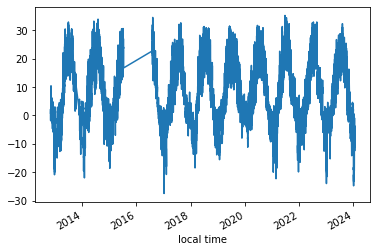

In [29]:
path = r'PW1_data\Moscow_rp5\27605.31.10.2012.21.01.2024.1.0.0.ru.utf8.00000000.xls'

df = read_rp5 (path)
display(df.columns)
display(df.head())
df['T'].plot()


## Чтение данных из архива "Погода и климат", первичный просмотр

'    <meta name="description" content="Архив фактической погоды в Москве (Балчуг) (атмосферное давление, температура воздуха, влажность воздуха, направление и скорость ветра, атмосферные явления, осадки) за ноябрь 2023 года.">\n'

Index(['Ветер (напр.,м/с)', 'Ветер (напр.,м/с)', 'Видим.', 'Явления',
       'Облачность', 'Т(С)', 'Тd(С)', 'f(%)', 'Тe(С)', 'Тes(С)',
       'Комфортность', 'P(гПа)', 'Po(гПа)', 'Тmin(С)', 'Tmax(С)', 'R(мм)',
       'R24(мм)', 'S(см)'],
      dtype='object', name=0)

,"Ветер (напр.,м/с)","Ветер (напр.,м/с)",Видим.,Явления,Облачность,Т(С),Тd(С),f(%),Тe(С),Тes(С),Комфортность,P(гПа),Po(гПа),Тmin(С),Tmax(С),R(мм),R24(мм),S(см)
UTC time,,,,,,,,,,,,,,,,,,
2023-11-01 00:00:00,Ю,1,4000 м,дымка,ясно,+10.1,+8.6,90,+10,+10,NaN,1009.0,994.0,NaN,NaN,NaN,NaN,NaN
2023-11-01 03:00:00,штиль,0,4000 м,дымка,10/10 600 м[Sc],+10.5,+8.7,89,+10,+10,NaN,1007.1,992.2,+8.3,NaN,NaN,NaN,NaN
2023-11-01 06:00:00,Ю,1,10 км,NaN,9/0[Ac trans Ci fib],+12.6,+9.5,81,+13,+13,NaN,1006.4,991.6,+8.5,NaN,NaN,NaN,NaN
2023-11-01 09:00:00,З,1,10 км,NaN,9/8 1000 м[Sc Ci],+14.2,+9.6,74,+15,+15,NaN,1006.8,992.0,NaN,NaN,NaN,NaN,NaN
2023-11-01 12:00:00,Ю,1,10 км,NaN,3/0[Ci fib],+16.3,+9.4,64,+17,+18,NaN,1004.5,989.9,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='UTC time'>

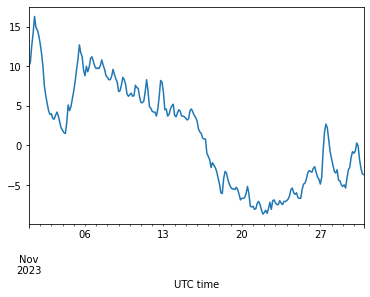

In [33]:
path = r'PW1_data\Moscow_weaclim\27605\27605_202311.html'

df = read_weaclim_html (path)
display(df.columns)
display(df.head())
df['Т(С)'].astype('float').plot()


str